In [1]:
library(data.table)
library(ComplexHeatmap)


Lade n"otiges Paket: grid

ComplexHeatmap version 2.15.4
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




In [2]:
library(extrafont)
font_import(paths = "/Library/Fonts", prompt = FALSE)
loadfonts()
fonts()


Registering fonts with R

Scanning ttf files in /Library/Fonts ...

Extracting .afm files from .ttf files...

/System/Library/Fonts/Supplemental/Arial Unicode.ttf
 : ArialUnicodeMS already registered in fonts database. Skipping.

/Library/Fonts/FontsFree-Net-MYRIADPRO-REGULAR.ttf
 : MyriadPro-Regular already registered in fonts database. Skipping.

Found FontName for 0 fonts.

Scanning afm files in /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/library/extrafontdb/metrics

Arial Unicode MS already registered with pdfFont().

Myriad Pro already registered with pdfFont().

Arial Unicode MS already registered with postscriptFont().

Myriad Pro already registered with postscriptFont().



[1] "Arial Unicode MS" "Myriad Pro"

In [3]:
options(repr.plot.width = 10, repr.plot.height = 8)
cpalette <- circlize::colorRamp2(c(0, 0.5, 1), hcl.colors(4, "Blues 3", rev = T)[1:3])


## Visualisation of concordance between genetic and hashing deconvolution methods through correlation matrix


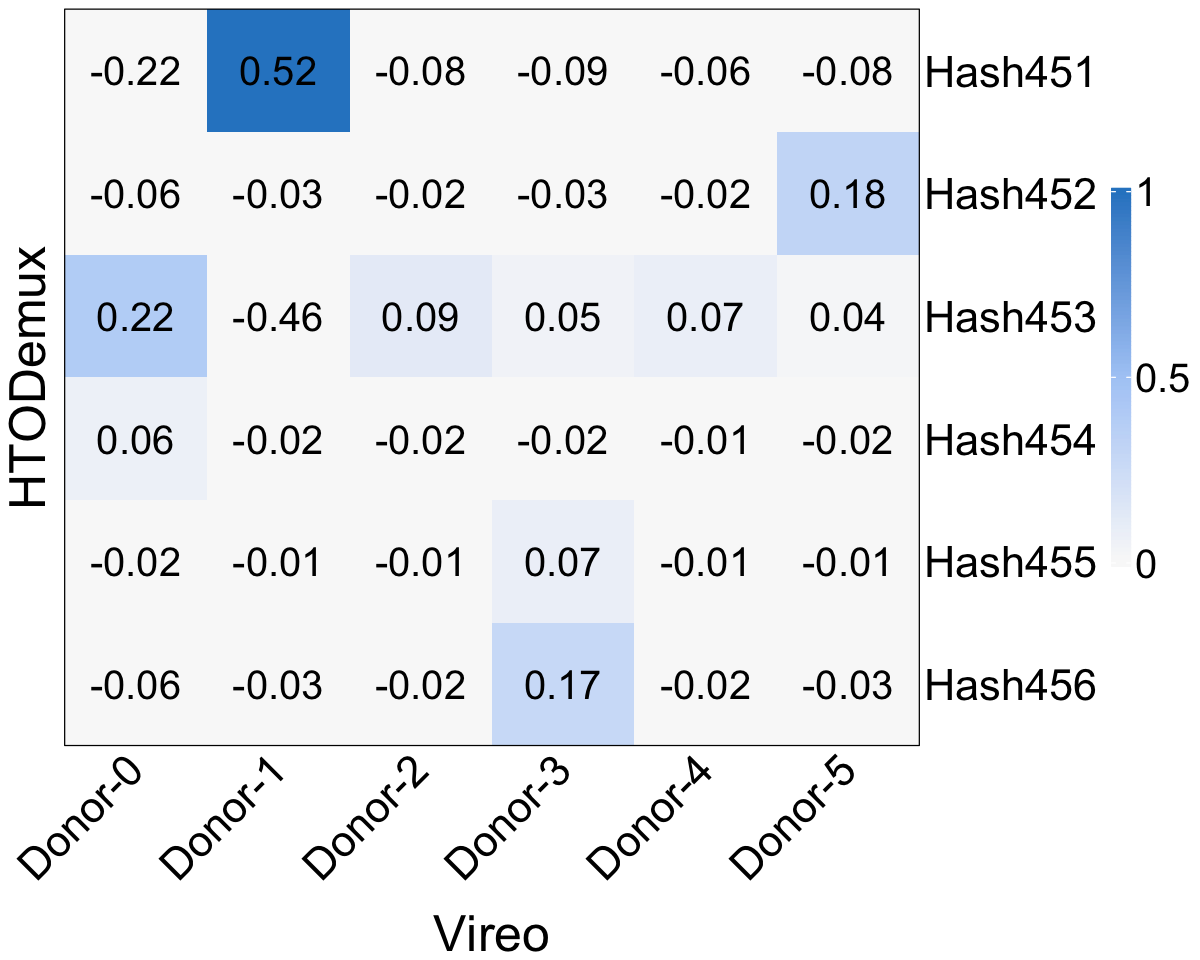

In [4]:
# Load correlation matrix
correlation_gx12 <-
  fread(
    "../data/pipeline_output/gx12/donor_match/vireo_1_vs_htodemux_1/correlation_res.csv"
  )
correlation_gx12 <- as.data.frame(correlation_gx12)
rownames(correlation_gx12) <- correlation_gx12$V1
correlation_gx12 <- correlation_gx12[, -1]
colnames(correlation_gx12) <-
  gsub("donor", "Donor-", colnames(correlation_gx12))
rownames(correlation_gx12) <-
  gsub("-TotalSeqA", "", rownames(correlation_gx12))

# Sort the axis
correlation_gx12 <-
  correlation_gx12[order(row.names(correlation_gx12)), ]

# Scale the matrix between -1 and 1
correlation_gx12 <- as.matrix(correlation_gx12)
min_value <- min(correlation_gx12)
max_value <- max(correlation_gx12)

scaled_matrix <-
  ((correlation_gx12 - min_value) / (max_value - min_value)) * 2 - 1

# pdf(
#   "s5/concordance-heatmap-v-htodemux-gx12.pdf",
#   height = 8,
#   width = 10
# )
# Heatamp
Heatmap(
  scaled_matrix,
  name = " ",
  cluster_columns = FALSE,
  cluster_rows = FALSE,
  row_title = "HTODemux",
  column_title = "Vireo",
  column_title_side = "bottom",
  border = TRUE,
  column_title_gp = gpar(fontsize = 30),
  row_title_gp = gpar(fontsize = 30),
  row_names_gp = gpar(fontsize = 26),
  column_names_gp = gpar(fontsize = 26, rot = 45),
  column_names_rot = 45,
  col = cpalette,
  heatmap_legend_param = list(
    legend_height = unit(8, "cm"),
    labels_gp = gpar(fontsize = 24)
  ),
  cell_fun = function(j, i, x, y, w, h, col) {
    grid.text(round(correlation_gx12[i, j], 2),
      x,
      y,
      gp = gpar(fontsize = 24, col = "black")
    )
  }
)

# dev.off()


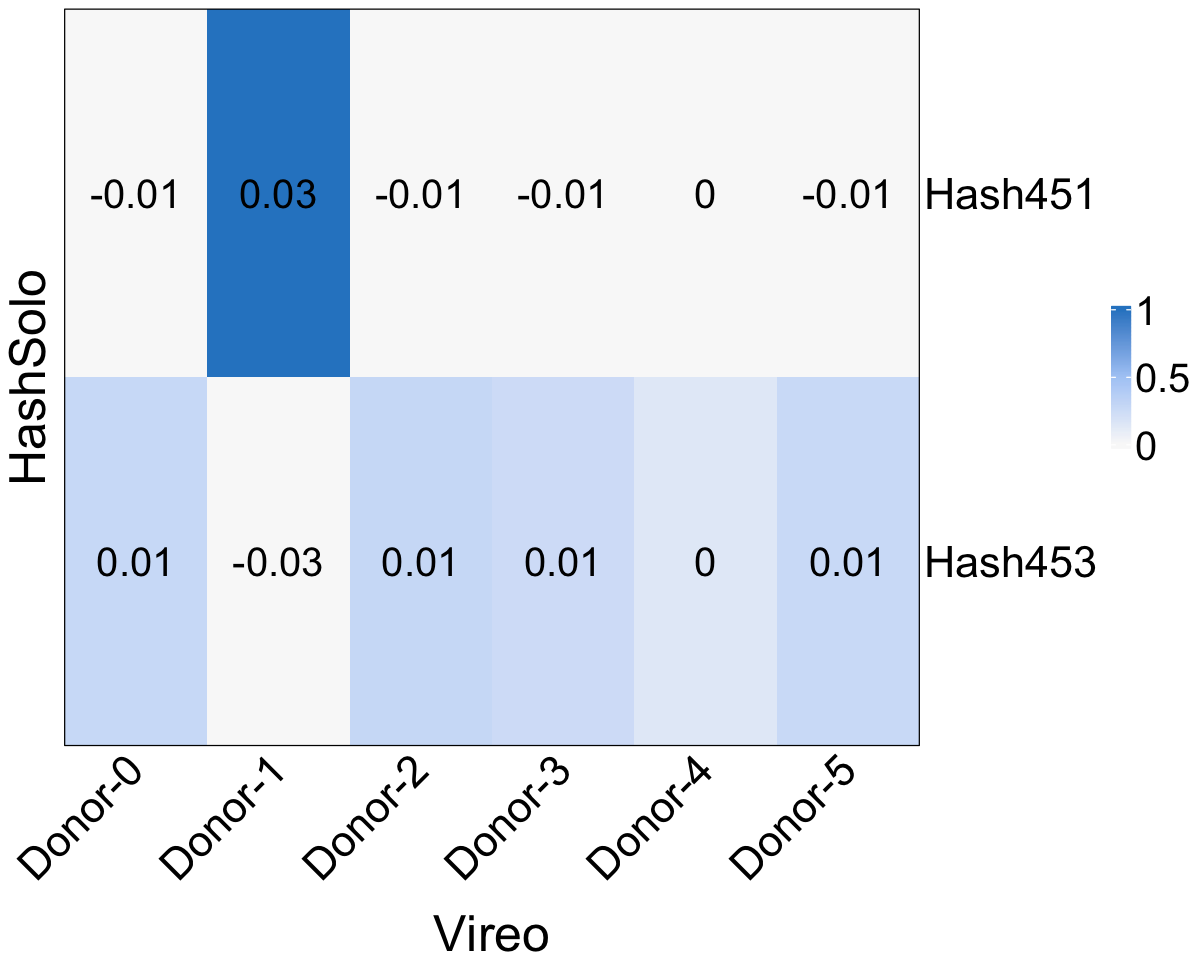

In [5]:
# Load correlation matrix
correlation_gx12 <-
  fread(
    "../data/pipeline_output/gx12/donor_match/vireo_1_vs_hashsolo_1/correlation_res.csv"
  )
correlation_gx12 <- as.data.frame(correlation_gx12)
rownames(correlation_gx12) <- correlation_gx12$V1
correlation_gx12 <- correlation_gx12[, -1]
colnames(correlation_gx12) <-
  gsub("donor", "Donor-", colnames(correlation_gx12))
rownames(correlation_gx12) <-
  gsub("_TotalSeqA", "", rownames(correlation_gx12))

# Sort the axis
correlation_gx12 <-
  correlation_gx12[order(row.names(correlation_gx12)), ]

# Scale the matrix between -1 and 1
correlation_gx12 <- as.matrix(correlation_gx12)

min_value <- min(correlation_gx12)
max_value <- max(correlation_gx12)

scaled_matrix <-
  ((correlation_gx12 - min_value) / (max_value - min_value)) * 2 - 1

# pdf(
#   "s5/concordance-heatmap-v-hashsolo-gx12.pdf",
#   family = "Myriad Pro",
#   height = 4,
#   width = 10
# )

# Heatamp
Heatmap(
  scaled_matrix,
  name = " ",
  cluster_columns = FALSE,
  cluster_rows = FALSE,
  row_title = "HashSolo",
  column_title = "Vireo",
  column_title_side = "bottom",
  border = TRUE,
  column_title_gp = gpar(fontsize = 30),
  row_title_gp = gpar(fontsize = 30),
  row_names_gp = gpar(fontsize = 26),
  column_names_gp = gpar(fontsize = 26, rot = 45),
  column_names_rot = 45,
  col = cpalette,
  heatmap_legend_param = list(
    legend_height = unit(3, "cm"),
    labels_gp = gpar(fontsize = 24)
  ),
  cell_fun = function(j, i, x, y, w, h, col) {
    grid.text(round(correlation_gx12[i, j], 2),
      x,
      y,
      gp = gpar(fontsize = 24, col = "black")
    )
  }
)
# dev.off()


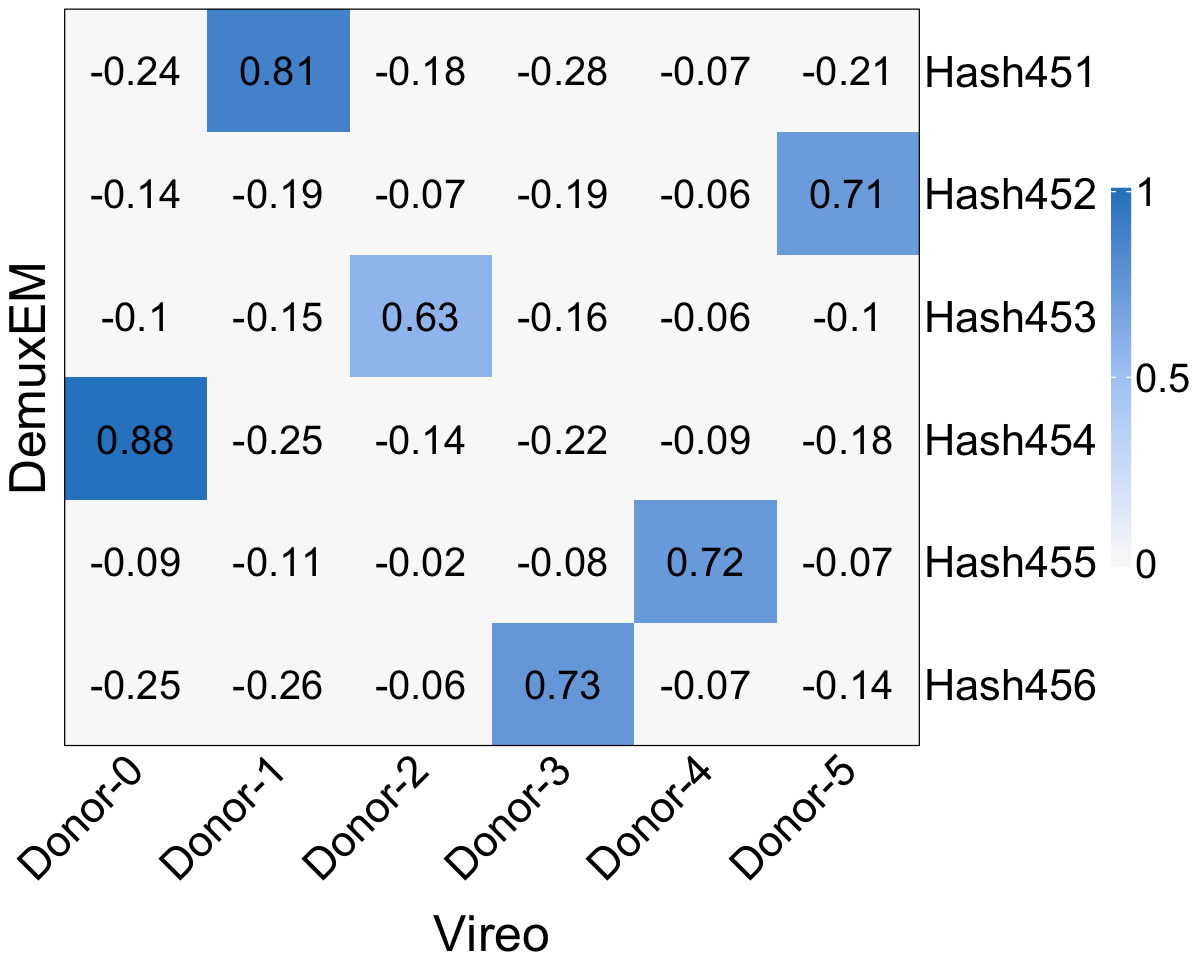

In [6]:
# Load correlation matrix
correlation_gx12 <-
  fread(
    "../data/pipeline_output/gx12/donor_match/vireo_1_vs_demuxem_1/correlation_res.csv"
  )
correlation_gx12 <- as.data.frame(correlation_gx12)
rownames(correlation_gx12) <- correlation_gx12$V1
correlation_gx12 <- correlation_gx12[, -1]
colnames(correlation_gx12) <-
  gsub("donor", "Donor-", colnames(correlation_gx12))
rownames(correlation_gx12) <-
  gsub("_TotalSeqA", "", rownames(correlation_gx12))

# Sort the axis
correlation_gx12 <-
  correlation_gx12[order(row.names(correlation_gx12)), ]

# Scale the matrix between -1 and 1
correlation_gx12 <- as.matrix(correlation_gx12)

min_value <- min(correlation_gx12)
max_value <- max(correlation_gx12)

scaled_matrix <-
  ((correlation_gx12 - min_value) / (max_value - min_value)) * 2 - 1

# pdf(
#   "s5/concordance-heatmap-v-demuxem-gx12.pdf",
#   family = "Myriad Pro",
#   height = 8,
#   width = 10
# )

# Heatamp
Heatmap(
  scaled_matrix,
  name = " ",
  cluster_columns = FALSE,
  cluster_rows = FALSE,
  row_title = "DemuxEM",
  column_title = "Vireo",
  column_title_side = "bottom",
  border = TRUE,
  column_title_gp = gpar(fontsize = 30),
  row_title_gp = gpar(fontsize = 30),
  row_names_gp = gpar(fontsize = 26),
  column_names_gp = gpar(fontsize = 26, rot = 45),
  column_names_rot = 45,
  col = cpalette,
  heatmap_legend_param = list(
    legend_height = unit(8, "cm"),
    labels_gp = gpar(fontsize = 24)
  ),
  cell_fun = function(j, i, x, y, w, h, col) {
    grid.text(round(correlation_gx12[i, j], 2),
      x,
      y,
      gp = gpar(fontsize = 24, col = "black")
    )
  }
)
# dev.off()


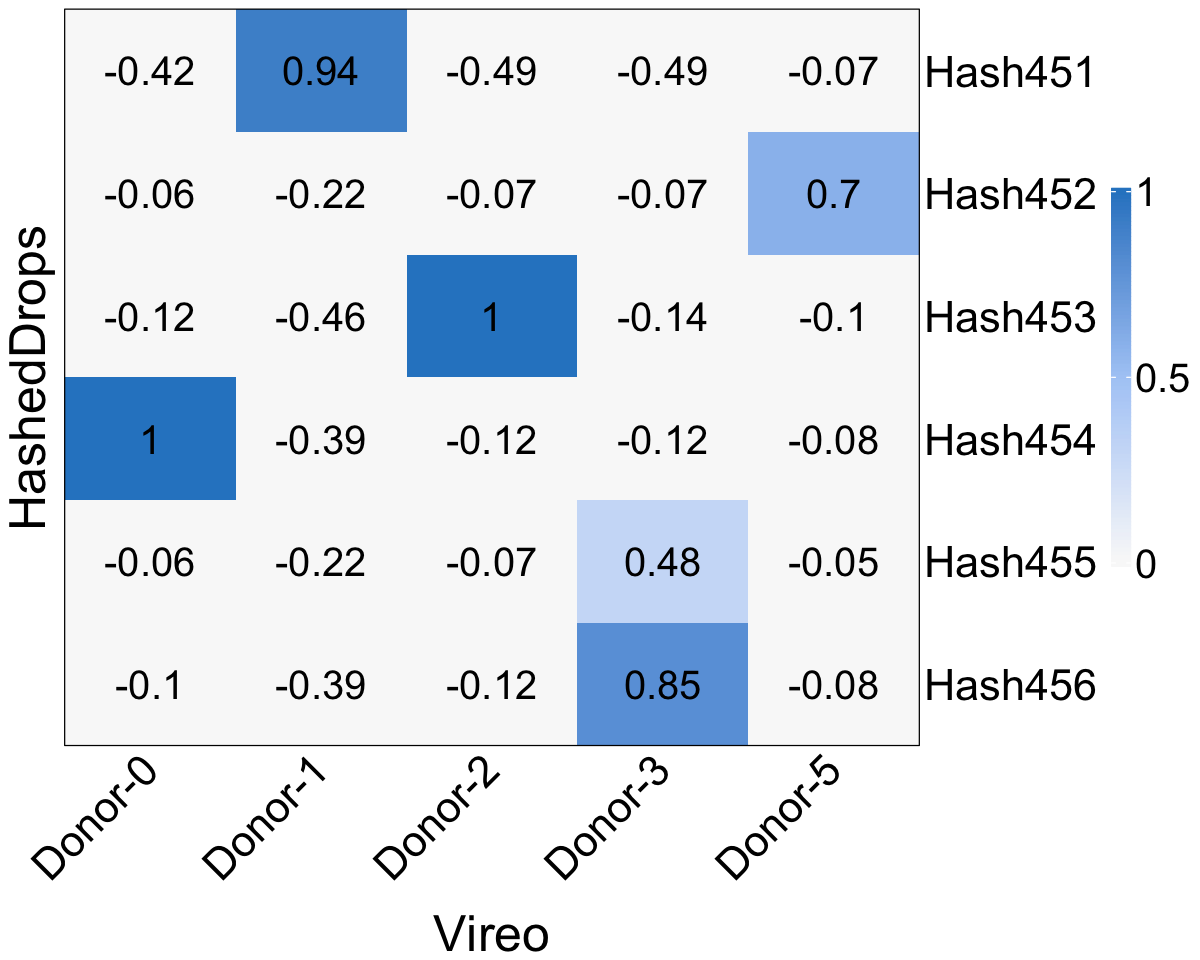

In [7]:
# Load correlation matrix
correlation_gx12 <-
  fread(
    "../data/pipeline_output/gx12/donor_match/vireo_1_vs_hashedDrops_1/correlation_res.csv"
  )
correlation_gx12 <- as.data.frame(correlation_gx12)
correlation_gx12 <-
  correlation_gx12[, colSums(is.na(correlation_gx12)) == 0]

rownames(correlation_gx12) <- correlation_gx12$V1
correlation_gx12 <- correlation_gx12[, -1]
colnames(correlation_gx12) <-
  gsub("donor", "Donor-", colnames(correlation_gx12))
rownames(correlation_gx12) <-
  paste0("Hash45", rownames(correlation_gx12))

# Sort the axis
correlation_gx12 <-
  correlation_gx12[order(row.names(correlation_gx12)), ]

# Scale the matrix between -1 and 1
correlation_gx12 <- as.matrix(correlation_gx12)

min_value <- min(correlation_gx12)
max_value <- max(correlation_gx12)

scaled_matrix <-
  ((correlation_gx12 - min_value) / (max_value - min_value)) * 2 - 1

# Heatamp
# pdf(
#   "s5/concordance-heatmap-v-hashedDrops-gx12.pdf",
#   family = "Myriad Pro",
#   height = 8,
#   width = 10
# )

Heatmap(
  scaled_matrix,
  name = " ",
  cluster_columns = FALSE,
  cluster_rows = FALSE,
  row_title = "HashedDrops",
  column_title = "Vireo",
  column_title_side = "bottom",
  border = TRUE,
  column_title_gp = gpar(fontsize = 30),
  row_title_gp = gpar(fontsize = 30),
  row_names_gp = gpar(fontsize = 26),
  column_names_gp = gpar(fontsize = 26, rot = 45),
  column_names_rot = 45,
  col = cpalette,
  heatmap_legend_param = list(
    legend_height = unit(8, "cm"),
    labels_gp = gpar(fontsize = 24)
  ),
  cell_fun = function(j, i, x, y, w, h, col) {
    grid.text(round(correlation_gx12[i, j], 2),
      x,
      y,
      gp = gpar(fontsize = 24, col = "black")
    )
  }
)
# dev.off()


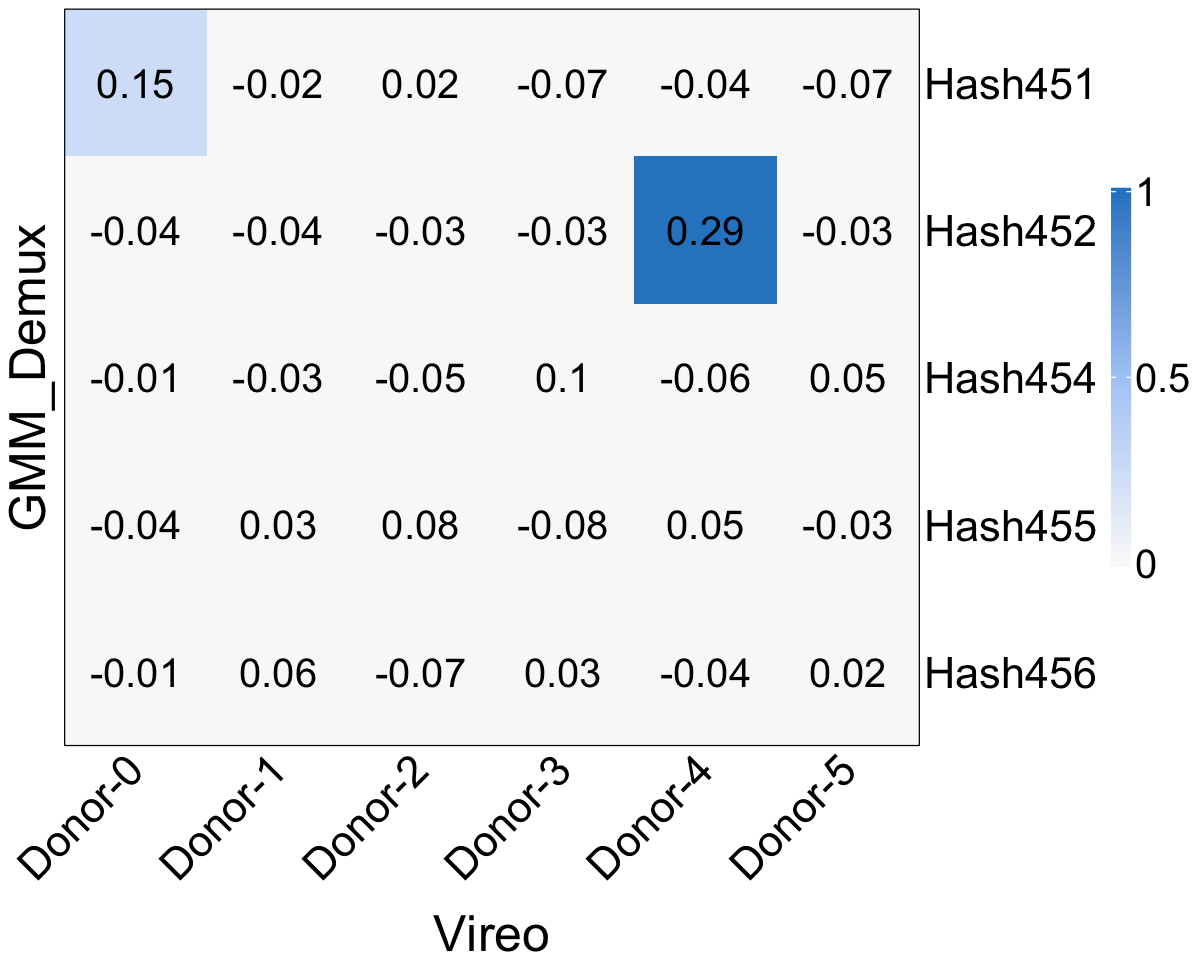

In [8]:
# Load correlation matrix
correlation_gx12 <-
  fread(
    "../data/pipeline_output/gx12/donor_match/vireo_1_vs_gmm_demux_1/correlation_res.csv"
  )
correlation_gx12 <- as.data.frame(correlation_gx12)
correlation_gx12 <-
  correlation_gx12[rowSums(is.na(correlation_gx12)) == 0, ]
rownames(correlation_gx12) <- correlation_gx12$V1
correlation_gx12 <- correlation_gx12[, -1]
colnames(correlation_gx12) <-
  gsub("donor", "Donor-", colnames(correlation_gx12))
rownames(correlation_gx12) <-
  gsub("_TotalSeqA", "", rownames(correlation_gx12))

# Sort the axis
correlation_gx12 <-
  correlation_gx12[order(row.names(correlation_gx12)), ]

# Scale the matrix between -1 and 1
correlation_gx12 <- as.matrix(correlation_gx12)

min_value <- min(correlation_gx12)
max_value <- max(correlation_gx12)

scaled_matrix <-
  ((correlation_gx12 - min_value) / (max_value - min_value)) * 2 - 1

# pdf(
#   "s5/concordance-heatmap-v-gmmdemux-gx12.pdf",
#   family = "Myriad Pro",
#   height = 8,
#   width = 10
# )

# Heatamp
Heatmap(
  scaled_matrix,
  name = " ",
  cluster_columns = FALSE,
  cluster_rows = FALSE,
  row_title = "GMM_Demux",
  column_title = "Vireo",
  column_title_side = "bottom",
  border = TRUE,
  column_title_gp = gpar(fontsize = 30),
  row_title_gp = gpar(fontsize = 30),
  row_names_gp = gpar(fontsize = 26),
  column_names_gp = gpar(fontsize = 26, rot = 45),
  column_names_rot = 45,
  col = cpalette,
  heatmap_legend_param = list(
    legend_height = unit(8, "cm"),
    labels_gp = gpar(fontsize = 24)
  ),
  cell_fun = function(j, i, x, y, w, h, col) {
    grid.text(round(correlation_gx12[i, j], 2),
      x,
      y,
      gp = gpar(fontsize = 24, col = "black")
    )
  }
)

# dev.off()


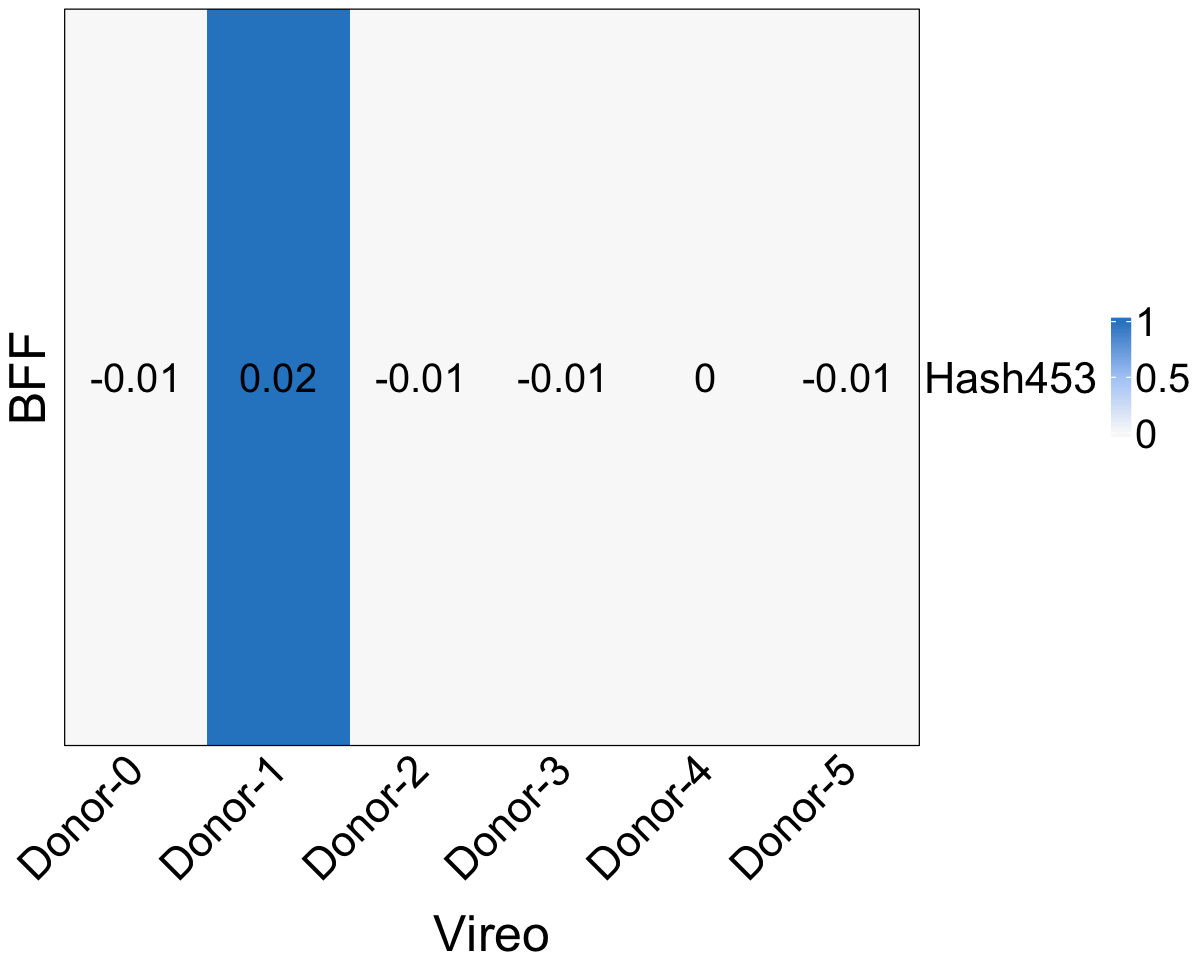

In [9]:
# Load correlation matrix
correlation_gx12 <-
  fread(
    "../data/pipeline_output/gx12/donor_match/vireo_1_vs_bff_1/correlation_res.csv"
  )
correlation_gx12 <- as.data.frame(correlation_gx12)
correlation_gx12 <-
  correlation_gx12[rowSums(is.na(correlation_gx12)) == 0, ]
rownames(correlation_gx12) <- correlation_gx12$V1
correlation_gx12 <- correlation_gx12[, -1]
colnames(correlation_gx12) <-
  gsub("donor", "Donor-", colnames(correlation_gx12))
rownames(correlation_gx12) <-
  gsub("_TotalSeqA", "", rownames(correlation_gx12))

# Sort the axis
correlation_gx12 <-
  correlation_gx12[order(row.names(correlation_gx12)), ]

# Scale the matrix between -1 and 1
correlation_gx12 <- as.matrix(correlation_gx12)

min_value <- min(correlation_gx12)
max_value <- max(correlation_gx12)

scaled_matrix <-
  ((correlation_gx12 - min_value) / (max_value - min_value)) * 2 - 1

# pdf(
#   "s5/concordance-heatmap-v-bff-gx12.pdf",
#   family = "Myriad Pro",
#   height = 3,
#   width = 10
# )

# Heatamp
Heatmap(
  scaled_matrix,
  name = " ",
  cluster_columns = FALSE,
  cluster_rows = FALSE,
  row_title = "BFF",
  column_title = "Vireo",
  column_title_side = "bottom",
  border = TRUE,
  column_title_gp = gpar(fontsize = 30),
  row_title_gp = gpar(fontsize = 30),
  row_names_gp = gpar(fontsize = 26),
  column_names_gp = gpar(fontsize = 26, rot = 45),
  column_names_rot = 45,
  col = cpalette,
  heatmap_legend_param = list(
    legend_height = unit(2.5, "cm"),
    labels_gp = gpar(fontsize = 24)
  ),
  cell_fun = function(j, i, x, y, w, h, col) {
    grid.text(round(correlation_gx12[i, j], 2),
      x,
      y,
      gp = gpar(fontsize = 24, col = "black")
    )
  }
)

# dev.off()
